In [ ]:
=from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/gdrive/


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 27), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.68 MiB | 16.40 MiB/s, done.
Resolving deltas: 100% (11717/11717), done.


In [ ]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 56.8 MB/s eta 0:00:00


In [ ]:
%cat /content/drive/MyDrive/YOLO모델/data.yaml

names:
- Outerwear
- knitwear
- Sweatshirts
- Tees
- Pants
- Headwear
- Accessories
nc: 7
train: "/content/drive/MyDrive/YOLO\u1106\u1169\u1103\u1166\u11AF/train.txt"
val: "/content/drive/MyDrive/YOLO\u1106\u1169\u1103\u1166\u11AF/val.txt"


In [ ]:
%cd
from glob import glob #이미지가 몇장인지 보여줌,
# 해당 패턴과 일치하는 모든 파일 경로를 리스트로 반환
img_list = glob('/content/drive/MyDrive/YOLO모델/images/*.jpg')
print(len(img_list))

/root
176


In [ ]:
# train과 val 이미지로 나눠줌,
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)
print(len(train_img_list), len(val_img_list))

140 36


In [ ]:
#train과 val이미지 txt파일로 저장해줌.
with open('/content/drive/MyDrive/YOLO모델/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')
with open('/content/drive/MyDrive/YOLO모델/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
import yaml
with open('/content/drive/MyDrive/YOLO모델/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/drive/MyDrive/YOLO모델/train.txt'
data['val'] = '/content/drive/MyDrive/YOLO모델/val.txt'

with open('/content/drive/MyDrive/YOLO모델/data.yaml','w') as f:
  yaml.dump(data, f)

  print(data)


{'names': ['Outerwear', 'knitwear', 'Sweatshirts', 'Tees', 'Pants', 'Headwear', 'Accessories'], 'nc': 7, 'train': '/content/drive/MyDrive/YOLO모델/train.txt', 'val': '/content/drive/MyDrive/YOLO모델/val.txt'}
{'names': ['Outerwear', 'knitwear', 'Sweatshirts', 'Tees', 'Pants', 'Headwear', 'Accessories'], 'nc': 7, 'train': '/content/drive/MyDrive/YOLO모델/train.txt', 'val': '/content/drive/MyDrive/YOLO모델/val.txt'}


In [ ]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 50 --data /content/drive/MyDrive/YOLO모델/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name clothes_yolov5s_results

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-09 12:56:01.594737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 12:56:01.614820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 12:56:01.621004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb:

In [ ]:
from IPython.display import Image
import os

val_img_path = val_img_list[10]

!python detect.py --weights /content/yolov5/runs/train/clothes_yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"


detect: weights=['/content/yolov5/runs/train/clothes_yolov5s_results2/weights/best.pt'], source=/content/drive/MyDrive/YOLO모델/images/image_5_9.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/YOLO모델/images/image_5_9.jpg: 416x320 1 Headwear, 28.3ms
Speed: 0.4ms pre-process, 28.3ms inference, 577.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to

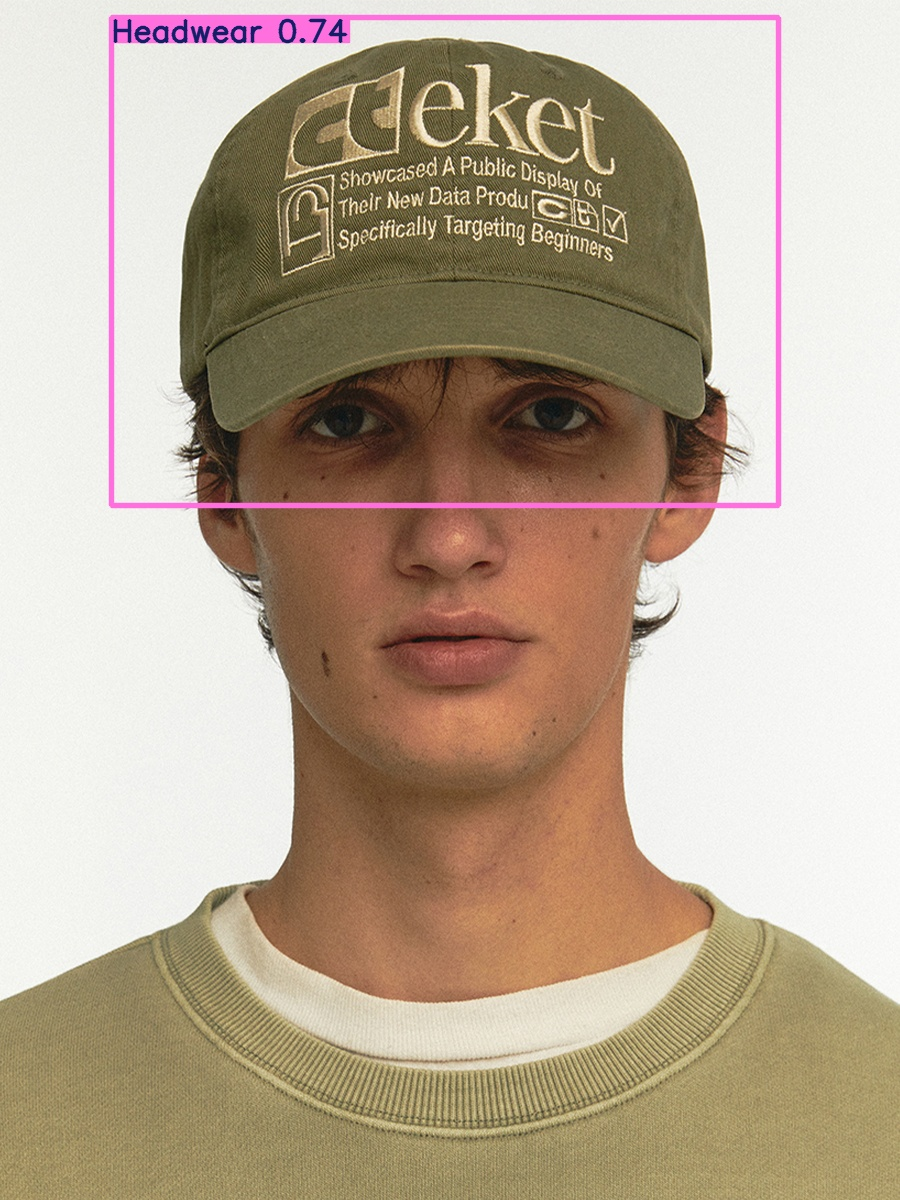

In [ ]:
Image(os.path.join('/content/yolov5/runs/detect/exp4', os.path.basename(val_img_path)))